In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.neighbors import DistanceMetric
from math import radians

# agosto


 Faltam os dias 3, 4, 5, 6, 12, 19, 26, 27

In [2]:
agosto = pd.read_csv('/Users/guilistocco/Documents/TCC 2 - Ônibus/BancoDados/Dados brutos/passengers_agosto.csv',
                    index_col= 'Unnamed: 0')

    #  Sao 214k linhas

In [3]:
agosto

,device_id,timestampI,timestampF,MAC,RSSI,channel,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,id,duration
0,617.0,1627887032,1627888203,24:fd:0d:bd:91:49,-83,1,-22.827640,-47.061036,-22.823898,-47.063036,2,0,1171
1,617.0,1627887033,1627889664,40:06:a0:5b:8c:b2,-51,12,-22.827717,-47.061002,-22.829839,-47.060069,27,1,2631
2,617.0,1627887034,1627888255,78:04:73:0a:8d:90,-85,11,-22.827797,-47.060968,-22.827860,-47.060928,9,2,1221
3,617.0,1627887040,1627889664,0c:ef:af:d3:00:36,-62,11,-22.828329,-47.060821,-22.829839,-47.060069,94,6,2624
4,617.0,1627887069,1627888309,6e:f2:cc:ea:6a:64,-93,11,-22.829653,-47.060836,-22.829349,-47.062100,50,9,1240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262086,NaN,1630437998,1630437998,70:ca:97:02:fa:e8,-96,11,-22.816053,-47.072787,-22.816053,-47.072787,2,406,0
262087,NaN,1630438003,1630438003,80:d0:4a:94:9b:1c,-85,6,-22.816329,-47.072811,-22.816329,-47.072811,2,407,0
262088,NaN,1630438006,1630438007,26:93:8f:55:ef:1c,-91,6,-22.816426,-47.072812,-22.816448,-47.072808,7,408,1
262089,NaN,1630438010,1630438031,68:02:b8:5d:41:da,-90,11,-22.816470,-47.072796,-22.816554,-47.072769,2,409,21



## Preparacao dos dados

In [4]:
agosto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262091 entries, 0 to 262090
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   device_id   121637 non-null  float64
 1   timestampI  262091 non-null  int64  
 2   timestampF  262091 non-null  int64  
 3   MAC         262091 non-null  object 
 4   RSSI        262091 non-null  int64  
 5   channel     262091 non-null  int64  
 6   latitudeI   262091 non-null  float64
 7   longitudeI  262091 non-null  float64
 8   latitudeF   262091 non-null  float64
 9   longitudeF  262091 non-null  float64
 10  cnt_pckg    262091 non-null  int64  
 11  id          262091 non-null  int64  
 12  duration    262091 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 28.0+ MB


In [5]:
## Tranforma timestamp em datas

agosto['dataInicio'] = pd.to_datetime(agosto['timestampI'], unit='s')
agosto['dataFim'] = pd.to_datetime(agosto['timestampF'], unit='s')

In [6]:
agosto = agosto[['MAC','latitudeI', 'longitudeI', 'latitudeF', 'longitudeF', 'cnt_pckg', 'duration', 'dataInicio', 'dataFim']]

In [7]:
## Cria a coluna com o dia de cada ping para os agrupamentos

agosto['day'] = agosto.dataInicio.dt.day

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_68026/691738157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agosto['day'] = agosto.dataInicio.dt.day


In [8]:
## Cria coluna de ID para cada um dos MACS para facilitar identificacao

MACs_unicos = agosto.MAC.unique()

temp = defaultdict(lambda: len(temp))
device_id = [temp[ele] for ele in MACs_unicos]

res = dict(zip(MACs_unicos, device_id))

agosto['device_id'] = agosto['MAC'].map(res)
agosto

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_68026/1828378363.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agosto['device_id'] = agosto['MAC'].map(res)


,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id
0,24:fd:0d:bd:91:49,-22.827640,-47.061036,-22.823898,-47.063036,2,1171,2021-08-02 06:50:32,2021-08-02 07:10:03,2,0
1,40:06:a0:5b:8c:b2,-22.827717,-47.061002,-22.829839,-47.060069,27,2631,2021-08-02 06:50:33,2021-08-02 07:34:24,2,1
2,78:04:73:0a:8d:90,-22.827797,-47.060968,-22.827860,-47.060928,9,1221,2021-08-02 06:50:34,2021-08-02 07:10:55,2,2
3,0c:ef:af:d3:00:36,-22.828329,-47.060821,-22.829839,-47.060069,94,2624,2021-08-02 06:50:40,2021-08-02 07:34:24,2,3
4,6e:f2:cc:ea:6a:64,-22.829653,-47.060836,-22.829349,-47.062100,50,1240,2021-08-02 06:51:09,2021-08-02 07:11:49,2,4
...,...,...,...,...,...,...,...,...,...,...,...
262086,70:ca:97:02:fa:e8,-22.816053,-47.072787,-22.816053,-47.072787,2,0,2021-08-31 19:26:38,2021-08-31 19:26:38,31,9098
262087,80:d0:4a:94:9b:1c,-22.816329,-47.072811,-22.816329,-47.072811,2,0,2021-08-31 19:26:43,2021-08-31 19:26:43,31,625
262088,26:93:8f:55:ef:1c,-22.816426,-47.072812,-22.816448,-47.072808,7,1,2021-08-31 19:26:46,2021-08-31 19:26:47,31,12824
262089,68:02:b8:5d:41:da,-22.816470,-47.072796,-22.816554,-47.072769,2,21,2021-08-31 19:26:50,2021-08-31 19:27:11,31,1876


In [9]:
## Adiciona sequence para identificar dentro de um dia de qual a o numero da conexao atual (em uma lista ordenada)

agosto.sort_values(by= ['device_id', 'dataInicio'], inplace = True)

agosto['sequence'] = agosto.groupby(['device_id', 'day']).cumcount()+1

agosto.reset_index(drop = True, inplace = True)

agosto

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_68026/4154853382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agosto.sort_values(by= ['device_id', 'dataInicio'], inplace = True)
/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_68026/4154853382.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agosto['sequence'] = agosto.groupby(['device_id', 'day']).cumcount()+1


,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id,sequence
0,24:fd:0d:bd:91:49,-22.827640,-47.061036,-22.823898,-47.063036,2,1171,2021-08-02 06:50:32,2021-08-02 07:10:03,2,0,1
1,24:fd:0d:bd:91:49,-22.827359,-47.061153,-22.827880,-47.060955,5,42,2021-08-02 08:19:14,2021-08-02 08:19:56,2,0,2
2,24:fd:0d:bd:91:49,-22.827686,-47.061002,-22.827686,-47.061002,1,0,2021-08-02 11:11:01,2021-08-02 11:11:01,2,0,3
3,24:fd:0d:bd:91:49,-22.826736,-47.061428,-22.826867,-47.061473,2,25,2021-08-02 11:55:30,2021-08-02 11:55:55,2,0,4
4,24:fd:0d:bd:91:49,-22.827635,-47.061051,-22.827635,-47.061051,1,0,2021-08-02 15:08:13,2021-08-02 15:08:13,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
262086,32:4b:bf:fa:8c:4a,-22.819221,-47.064676,-22.819221,-47.064676,1,0,2021-08-31 19:19:11,2021-08-31 19:19:11,31,93781,1
262087,b6:e9:5d:f5:b5:4a,-22.818655,-47.064263,-22.818655,-47.064263,4,0,2021-08-31 19:19:24,2021-08-31 19:19:24,31,93782,1
262088,5a:17:cb:db:6c:0d,-22.817414,-47.063752,-22.817310,-47.063721,2,1,2021-08-31 19:19:45,2021-08-31 19:19:46,31,93783,1
262089,2e:45:9d:cd:45:0d,-22.813378,-47.064453,-22.813378,-47.064453,1,0,2021-08-31 19:20:48,2021-08-31 19:20:48,31,93784,1


In [10]:
## Criando coluna de duracao da conexao entre os pings

agosto['duration(s)'] = (agosto['dataFim'] - agosto['dataInicio']).dt.total_seconds()

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_68026/2343791547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agosto['duration(s)'] = (agosto['dataFim'] - agosto['dataInicio']).dt.total_seconds()


In [11]:
## funcao de calculo de distancia entre o ponto de inicio e fim da conexao

def haversine_vectorize(lon1, lat1, lon2, lat2):
    # print(lon1, lat1, lon2, lat2)
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    m = 6_367_000 * dist #6367 for distance in KM for miles use 3958
    return m

agosto['distance(m)'] = agosto.apply(lambda x : haversine_vectorize(x['longitudeI'], x['latitudeI'], x['longitudeF'], x['latitudeF']), axis = 1)

agosto

/var/folders/21/6bbwtzhx0js126xjwqnzpzzc0000gn/T/ipykernel_68026/2295181299.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agosto['distance(m)'] = agosto.apply(lambda x : haversine_vectorize(x['longitudeI'], x['latitudeI'], x['longitudeF'], x['latitudeF']), axis = 1)


,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id,sequence,duration(s),distance(m)
0,24:fd:0d:bd:91:49,-22.827640,-47.061036,-22.823898,-47.063036,2,1171,2021-08-02 06:50:32,2021-08-02 07:10:03,2,0,1,1171.0,463.547655
1,24:fd:0d:bd:91:49,-22.827359,-47.061153,-22.827880,-47.060955,5,42,2021-08-02 08:19:14,2021-08-02 08:19:56,2,0,2,42.0,61.345118
2,24:fd:0d:bd:91:49,-22.827686,-47.061002,-22.827686,-47.061002,1,0,2021-08-02 11:11:01,2021-08-02 11:11:01,2,0,3,0.0,0.000000
3,24:fd:0d:bd:91:49,-22.826736,-47.061428,-22.826867,-47.061473,2,25,2021-08-02 11:55:30,2021-08-02 11:55:55,2,0,4,25.0,15.269590
4,24:fd:0d:bd:91:49,-22.827635,-47.061051,-22.827635,-47.061051,1,0,2021-08-02 15:08:13,2021-08-02 15:08:13,2,0,5,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262086,32:4b:bf:fa:8c:4a,-22.819221,-47.064676,-22.819221,-47.064676,1,0,2021-08-31 19:19:11,2021-08-31 19:19:11,31,93781,1,0.0,0.000000
262087,b6:e9:5d:f5:b5:4a,-22.818655,-47.064263,-22.818655,-47.064263,4,0,2021-08-31 19:19:24,2021-08-31 19:19:24,31,93782,1,0.0,0.000000
262088,5a:17:cb:db:6c:0d,-22.817414,-47.063752,-22.817310,-47.063721,2,1,2021-08-31 19:19:45,2021-08-31 19:19:46,31,93783,1,1.0,11.985285
262089,2e:45:9d:cd:45:0d,-22.813378,-47.064453,-22.813378,-47.064453,1,0,2021-08-31 19:20:48,2021-08-31 19:20:48,31,93784,1,0.0,0.000000


In [12]:
## Coluna de velocidade media para avalicao se os movimentos sao coerentes

agosto['velMed(km/h)'] = agosto['distance(m)']/agosto['duration(s)'] *3.6
agosto

,MAC,latitudeI,longitudeI,latitudeF,longitudeF,cnt_pckg,duration,dataInicio,dataFim,day,device_id,sequence,duration(s),distance(m),velMed(km/h)
0,24:fd:0d:bd:91:49,-22.827640,-47.061036,-22.823898,-47.063036,2,1171,2021-08-02 06:50:32,2021-08-02 07:10:03,2,0,1,1171.0,463.547655,1.425082
1,24:fd:0d:bd:91:49,-22.827359,-47.061153,-22.827880,-47.060955,5,42,2021-08-02 08:19:14,2021-08-02 08:19:56,2,0,2,42.0,61.345118,5.258153
2,24:fd:0d:bd:91:49,-22.827686,-47.061002,-22.827686,-47.061002,1,0,2021-08-02 11:11:01,2021-08-02 11:11:01,2,0,3,0.0,0.000000,NaN
3,24:fd:0d:bd:91:49,-22.826736,-47.061428,-22.826867,-47.061473,2,25,2021-08-02 11:55:30,2021-08-02 11:55:55,2,0,4,25.0,15.269590,2.198821
4,24:fd:0d:bd:91:49,-22.827635,-47.061051,-22.827635,-47.061051,1,0,2021-08-02 15:08:13,2021-08-02 15:08:13,2,0,5,0.0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262086,32:4b:bf:fa:8c:4a,-22.819221,-47.064676,-22.819221,-47.064676,1,0,2021-08-31 19:19:11,2021-08-31 19:19:11,31,93781,1,0.0,0.000000,NaN
262087,b6:e9:5d:f5:b5:4a,-22.818655,-47.064263,-22.818655,-47.064263,4,0,2021-08-31 19:19:24,2021-08-31 19:19:24,31,93782,1,0.0,0.000000,NaN
262088,5a:17:cb:db:6c:0d,-22.817414,-47.063752,-22.817310,-47.063721,2,1,2021-08-31 19:19:45,2021-08-31 19:19:46,31,93783,1,1.0,11.985285,43.147027
262089,2e:45:9d:cd:45:0d,-22.813378,-47.064453,-22.813378,-47.064453,1,0,2021-08-31 19:20:48,2021-08-31 19:20:48,31,93784,1,0.0,0.000000,NaN


## Agrupamentio dos usuarios por dias contando numero de conexoes

Aqui pode haver mais coisas a se fazer

Como eh possivel ver no caso do dia=1 device=0
 - a data de inicio eh no dia 1, e a data fim eh no dia 2
 - isso nao acontece pra todos os devices, mas para os que acontecem pode ser retrabalhado

In [13]:
agosto_group = agosto.groupby(['day','device_id']).agg({
                                                        'dataInicio': 'min',
                                                        'dataFim':'max',
                                                        'sequence':'count',
                                                        'distance(m)':'sum',
                                                        'duration(s)':'sum'
})
agosto_group

dataInicio             dataFim  sequence  distance(m)  \
day device_id                                                                  
2   0         2021-08-02 06:50:32 2021-08-02 17:21:13         7   578.568217   
    1         2021-08-02 06:50:33 2021-08-02 18:41:33        20  4952.982325   
    2         2021-08-02 06:50:34 2021-08-02 17:21:27        12   842.141220   
    3         2021-08-02 06:50:40 2021-08-02 17:40:03        15  4191.573797   
    4         2021-08-02 06:51:09 2021-08-02 07:11:49         1   133.793927   
...                           ...                 ...       ...          ...   
31  93781     2021-08-31 19:19:11 2021-08-31 19:19:11         1     0.000000   
    93782     2021-08-31 19:19:24 2021-08-31 19:19:24         1     0.000000   
    93783     2021-08-31 19:19:45 2021-08-31 19:19:46         1    11.985285   
    93784     2021-08-31 19:20:48 2021-08-31 19:20:48         1     0.000000   
    93785     2021-08-31 19:27:13 2021-08-31 19:27:13         1     0.000000   

               duration(s)  
day device_id               
2   0               1274.0  
    1              21705.0  
    2               1364.0  
    3              21147.0  
    4               1240.0  
...                    ...  
31  93781              0.0  
    93782              0.0  
    93783              1.0  
    93784              0.0  
    93785              0.0  

[149137 rows x 5 columns]

#### Recuperando a primeira e ultima coordenada

 - Usando o usuario/MAC e o primeiro e ultimo momento em conexao
 - Buscar as coordenadas desses dispositivos nesse instante (inicial e final)
 - Comparar com a coordenada dos pontos de onibus para determinar qual o ponto de embarque do passageiro e ponto de desembarque

In [14]:
agosto_coordenadas = agosto_group.merge(agosto[['day','device_id', 'dataInicio', 'latitudeI', 'longitudeI']],  
                                        right_on= ['day', 'device_id', 'dataInicio'], 
                                        left_on=  ['day','device_id', 'dataInicio']).merge(
                                            agosto[['day','device_id', 'dataFim', 'latitudeF', 'longitudeF']],  
                                            right_on= ['day', 'device_id', 'dataFim'], 
                                            left_on=  ['day','device_id', 'dataFim'])
agosto_coordenadas

,day,device_id,dataInicio,dataFim,sequence,distance(m),duration(s),latitudeI,longitudeI,latitudeF,longitudeF
0,2,0,2021-08-02 06:50:32,2021-08-02 17:21:13,7,578.568217,1274.0,-22.827640,-47.061036,-22.827067,-47.061339
1,2,1,2021-08-02 06:50:33,2021-08-02 18:41:33,20,4952.982325,21705.0,-22.827717,-47.061002,-22.829491,-47.062191
2,2,2,2021-08-02 06:50:34,2021-08-02 17:21:27,12,842.141220,1364.0,-22.827797,-47.060968,-22.828095,-47.060890
3,2,3,2021-08-02 06:50:40,2021-08-02 17:40:03,15,4191.573797,21147.0,-22.828329,-47.060821,-22.829798,-47.060023
4,2,4,2021-08-02 06:51:09,2021-08-02 07:11:49,1,133.793927,1240.0,-22.829653,-47.060836,-22.829349,-47.062100
...,...,...,...,...,...,...,...,...,...,...,...
152051,31,93781,2021-08-31 19:19:11,2021-08-31 19:19:11,1,0.000000,0.0,-22.819221,-47.064676,-22.819221,-47.064676
152052,31,93782,2021-08-31 19:19:24,2021-08-31 19:19:24,1,0.000000,0.0,-22.818655,-47.064263,-22.818655,-47.064263
152053,31,93783,2021-08-31 19:19:45,2021-08-31 19:19:46,1,11.985285,1.0,-22.817414,-47.063752,-22.817310,-47.063721
152054,31,93784,2021-08-31 19:20:48,2021-08-31 19:20:48,1,0.000000,0.0,-22.813378,-47.064453,-22.813378,-47.064453


## Selecao de passageiros validos

#### Histograma Duration 
    - entre um minuto e uma hora de viagem
    - pelo menos 300m percorridos

Conclusao: Concentracao viagens de curta ducarao (ate 10 minutos)

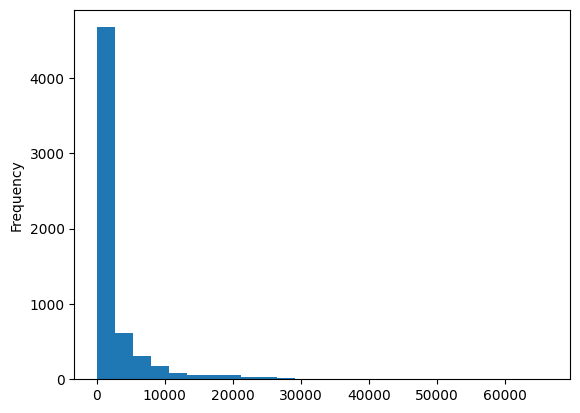

In [15]:

agosto_coordenadas.loc[  ((  agosto_coordenadas['duration(s)'] > 60   ) ) &
                        ((  agosto_coordenadas['distance(m)'] > 300   )  ), 'duration(s)'].plot(kind='hist', bins = 25);

##### Casos para corte dos passageiros validos

- Ha casos em que a duracao conexao de um passageiro eh superior a 47000 segundos (12h)
    - isso ocorre para passageiros que usam a linha diariamente
    - assim a dataInicio ocorre no fim de um dia e a dataFim no inicio de outro
- Com isso deve-se faze rum corte para retirar essas anomalia

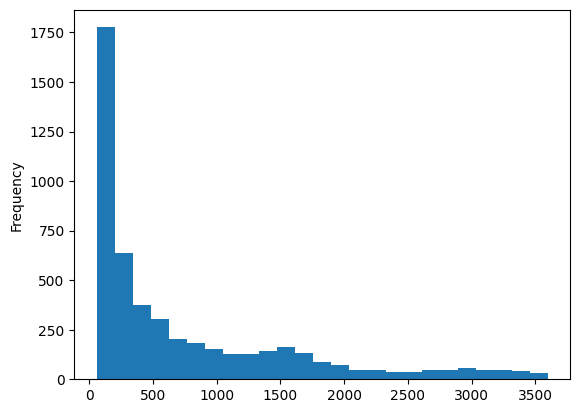

In [16]:
agosto_coordenadas.loc[  ((  agosto_coordenadas['duration(s)'] > 60   ) & (  agosto_coordenadas['duration(s)'] < 3600   ) ) &
                        ((  agosto_coordenadas['distance(m)'] > 300   )  ), 'duration(s)'].plot(kind='hist', bins = 25);

#### Histograma Distance 
    - entre um minuto e uma hora de viagem
    - pelo menos 300m percorridos

##### Conclusao: Absoluta concentracao viagens de curta ducarao (ate 10 minutos)

    - 95% percentil de viagens é de 2km
    - Sao 230 viagens com mais de 2km, razoavel retirar sujeira

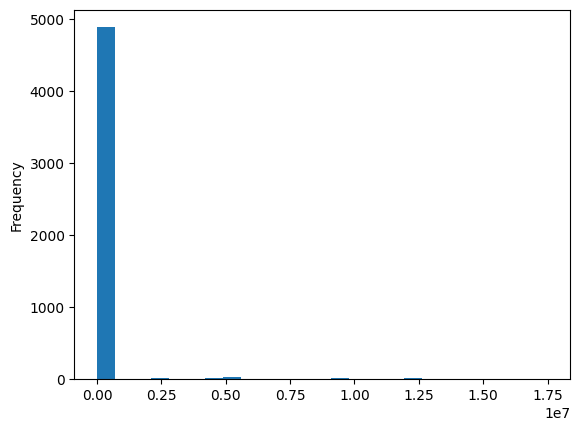

In [17]:

agosto_coordenadas.loc[  ((  agosto_coordenadas['duration(s)'] > 60   ) & (  agosto_coordenadas['duration(s)'] < 3600   ) ) &
                        ((  agosto_coordenadas['distance(m)'] > 300   )  ), 'distance(m)'].plot(kind='hist', bins = 25);

In [18]:

agosto_coordenadas.loc[  ((  agosto_coordenadas['duration(s)'] > 60   ) & (  agosto_coordenadas['duration(s)'] < 3600   ) ) &
                        ((  agosto_coordenadas['distance(m)'] > 300   )  ), 'distance(m)'].describe(percentiles=[ .25, .5, .75, .80, .85, .90, .95])
# sao 4030

count    4.962000e+03
mean     9.834237e+04
std      8.843925e+05
min      3.000479e+02
25%      4.338265e+02
50%      6.301579e+02
75%      1.006581e+03
80%      1.176847e+03
85%      1.354063e+03
90%      1.621806e+03
95%      2.115474e+03
max      1.750881e+07
Name: distance(m), dtype: float64

In [19]:

agosto_coordenadas.loc[  ((  agosto_coordenadas['duration(s)'] > 60   ) & (  agosto_coordenadas['duration(s)'] < 3600   ) ) &
                        ((  agosto_coordenadas['distance(m)'] > 2000   )  ) ]

,day,device_id,dataInicio,dataFim,sequence,distance(m),duration(s),latitudeI,longitudeI,latitudeF,longitudeF
169,2,169,2021-08-02 06:57:01,2021-08-02 17:28:04,13,2.608749e+03,491.0,-22.820390,-47.071301,-22.818012,-47.072576
258,2,258,2021-08-02 07:03:28,2021-08-02 18:35:57,12,1.246395e+07,1981.0,-22.820949,-47.068032,-22.821305,-47.067791
284,2,284,2021-08-02 07:05:04,2021-08-02 18:48:56,24,3.234022e+03,1599.0,-22.816573,-47.063608,-22.815636,-47.063692
292,2,292,2021-08-02 07:05:51,2021-08-02 18:50:11,20,2.091650e+03,3152.0,-22.813225,-47.064329,-22.814202,-47.063096
296,2,296,2021-08-02 07:06:32,2021-08-02 17:33:44,22,4.476060e+03,2960.0,-22.815524,-47.062611,-22.818371,-47.059642
...,...,...,...,...,...,...,...,...,...,...,...
147600,31,889,2021-08-31 07:28:18,2021-08-31 19:21:24,12,2.690083e+03,1158.0,-22.816254,-47.062510,-22.814707,-47.062858
147823,31,1889,2021-08-31 07:12:53,2021-08-31 19:16:18,13,3.548725e+03,2994.0,-22.828869,-47.065908,-22.825075,-47.066018
148227,31,5111,2021-08-31 07:33:24,2021-08-31 19:10:05,12,7.203025e+06,2187.0,-22.827286,-47.067423,-22.828104,-47.066731
148541,31,8108,2021-08-31 11:18:16,2021-08-31 15:01:01,2,2.924644e+03,1314.0,-22.829542,-47.063313,-22.813778,-47.069640


In [20]:

agosto_coordenadas.loc[  ((  agosto_coordenadas['duration(s)'] > 60   ) & (  agosto_coordenadas['duration(s)'] < 3600   ) ) &
                        ((  agosto_coordenadas['distance(m)'] > 2000   )  ), 'distance(m)'].describe(percentiles=[ .25, .5, .75, .80, .85, .90, .95])
# sao 4030

count    2.860000e+02
mean     1.694327e+06
std      3.301886e+06
min      2.000022e+03
25%      2.260129e+03
50%      2.743557e+03
75%      2.556668e+06
80%      4.871108e+06
85%      5.070782e+06
90%      5.163860e+06
95%      9.433094e+06
max      1.750881e+07
Name: distance(m), dtype: float64

### Passageiros Validos

Foi adotado a duracao das viagens entre 60s e 1h

e com distancia percorrida entre 300m e 2,125km



In [21]:
validas_agosto = agosto_coordenadas.loc[  ((  agosto_coordenadas['duration(s)'] > 60   ) & (  agosto_coordenadas['duration(s)'] < 3600   ) ) &
                        ((  agosto_coordenadas['distance(m)'] > 300  ) & (  agosto_coordenadas['distance(m)'] < 2125   )  )]
validas_agosto

,day,device_id,dataInicio,dataFim,sequence,distance(m),duration(s),latitudeI,longitudeI,latitudeF,longitudeF
0,2,0,2021-08-02 06:50:32,2021-08-02 17:21:13,7,578.568217,1274.0,-22.827640,-47.061036,-22.827067,-47.061339
2,2,2,2021-08-02 06:50:34,2021-08-02 17:21:27,12,842.141220,1364.0,-22.827797,-47.060968,-22.828095,-47.060890
6,2,6,2021-08-02 06:50:40,2021-08-02 17:21:29,14,374.133485,2645.0,-22.828329,-47.060821,-22.828301,-47.060828
16,2,16,2021-08-02 06:51:48,2021-08-02 17:39:02,13,1149.542113,3260.0,-22.829586,-47.062622,-22.830745,-47.062220
26,2,26,2021-08-02 06:52:27,2021-08-02 17:37:43,15,921.213287,3173.0,-22.829072,-47.065700,-22.828525,-47.066327
...,...,...,...,...,...,...,...,...,...,...,...
151378,31,93119,2021-08-31 15:32:42,2021-08-31 15:39:35,2,314.803496,826.0,-22.828876,-47.066029,-22.827759,-47.066974
151379,31,93119,2021-08-31 15:32:42,2021-08-31 15:39:35,2,314.803496,826.0,-22.828876,-47.066029,-22.827759,-47.066974
151380,31,93119,2021-08-31 15:32:42,2021-08-31 15:39:35,2,314.803496,826.0,-22.828876,-47.066029,-22.827759,-47.066974
151494,31,93233,2021-08-31 16:19:17,2021-08-31 16:23:33,1,684.464000,256.0,-22.831021,-47.063912,-22.824985,-47.065243


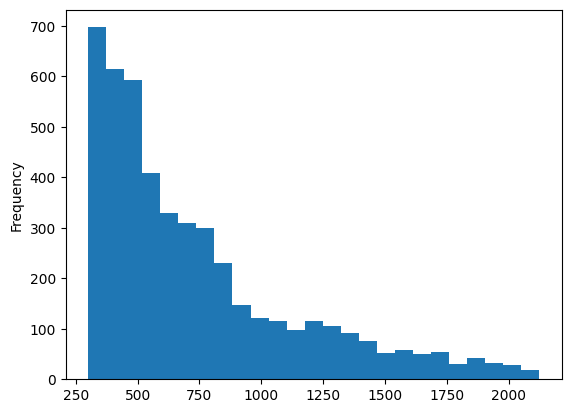

In [22]:
validas_agosto['distance(m)'].plot(kind='hist', bins = 25);

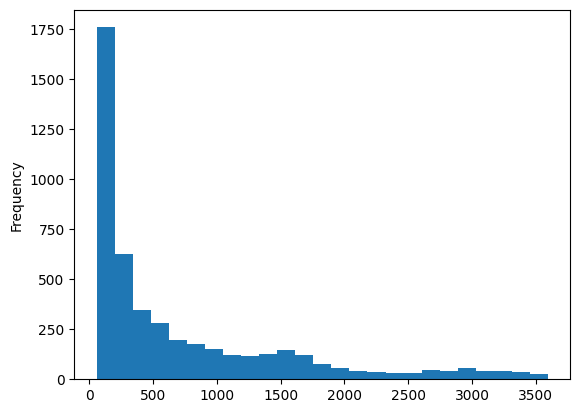

In [23]:
validas_agosto['duration(s)'].plot(kind='hist', bins = 25);

In [24]:
validas_agosto.to_excel('viagens_validas_agosto.xlsx', engine = 'openpyxl')

agosto

agosto.drop(axis = 1, labels= ['ID_VIAGEM'], inplace = True)

validas_agosto['ID_VIAGEM'] = validas_agosto['device_id'].astype('str') + '_' +  validas_agosto['dataInicio'].dt.day.astype('str') + '_' + validas_agosto['dataInicio'].dt.month.astype('str')
validas_agosto['ID_VIAGEM'] 

validas_agosto

In [25]:
validas_agosto.day.value_counts().sort_index()#.plot(kind='hist', bins = 25);

2     234
3     256
4     254
5      85
6     126
9     133
10    120
11    277
12    234
13    152
16    209
17    210
18    276
19    241
20    244
21      1
23    259
24    264
25    226
26    279
27    257
30    225
31    155
Name: day, dtype: int64

- com o agrupado temos os pontos de onibus de chegada e saida
- 
- 